In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [21]:
df = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/RISHAV NIIT SEM 3/data visualisation - krishnamurthy sir/ind_food.csv')

In [22]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [23]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [24]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [25]:
df.fillna(value= '-1', inplace = True)

In [26]:
df.region.replace(['-1'], 'unknown', regex = True, inplace = True)

In [27]:
l = []
for i in range(len(df)) : 
    y = df.ingredients.loc[i]
    y_ = y.split(sep = ',')
    l.append(len(y_))
df['total_ingredients'] = pd.Series(l)

In [28]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8


In [29]:
df.prep_time.replace(-1, df.prep_time.median(), regex = True, inplace = True)
df.cook_time.replace(-1, df.cook_time.median(), regex = True, inplace = True)
df.flavor_profile.replace('-1', 'unique', regex = True, inplace = True)
df.state.replace('-1', 'unknown', regex = True, inplace = True)

In [30]:
os.getcwd()

'C:\\Users\\Admin'

In [31]:
fig = px.scatter_3d(df, x='prep_time', y='cook_time', z='total_ingredients',
                    color='state',
                    hover_data=['name'],
                    opacity=0.5)
fig.update_layout(title='Time and total ingredient of food')
fig.show()

In [32]:
def plot_graph(value, name, title, color, category) : 
    new_df = df[name].value_counts().reset_index()
    new_df.columns = [value, 'Total']
    if color == 'Rainbow' : 
        if category == 'pie' : 
            fig = px.pie(new_df, values= 'Total', names = value, title = title,
                         color_discrete_sequence=px.colors.sequential.Rainbow)
            return fig.show()
        elif category == 'bar' : 
            fig = px.bar(new_df, y= 'Total', x = value, title = title,
                         color_discrete_sequence=px.colors.sequential.RdBu)
            return fig.show()
        elif color == 'Rainbow' : 
            if category == 'pie' : 
                fig = px.pie(new_df, values= 'Total', names = value, title = title,
                         color_discrete_sequence=px.colors.sequential.Rainbow)
                return fig.show()
            elif category == 'bar' : 
                fig = px.bar(new_df, y= 'Total', x = value, title = title,
                         color_discrete_sequence=px.colors.sequential.Rainbow)
                return fig.show()
    else : 
        if category == 'pie' : 
            fig = px.pie(new_df, values= 'Total', names = value, title = title)
            return fig.show()
        elif category == 'bar' : 
            fig = px.bar(new_df, y= 'Total', x = value, title = title)
            return fig.show()

In [33]:
plot_graph('Diet','diet', 'Proportion of Vegetarian and Non-Vegetarian dishes', None, 'pie')

In [34]:
df_ = df[['state','name']]
df_ = df.groupby('state').count()
df_.reset_index(inplace = True)
df_.sort_values(by = 'name', ascending = False, inplace = True)
df_.head(5)

,state,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,region,total_ingredients
5,Gujarat,35,35,35,35,35,35,35,35,35
16,Punjab,32,32,32,32,32,32,32,32,32
11,Maharashtra,30,30,30,30,30,30,30,30,30
24,unknown,24,24,24,24,24,24,24,24,24
23,West Bengal,24,24,24,24,24,24,24,24,24


### states with maximum no of available dishes

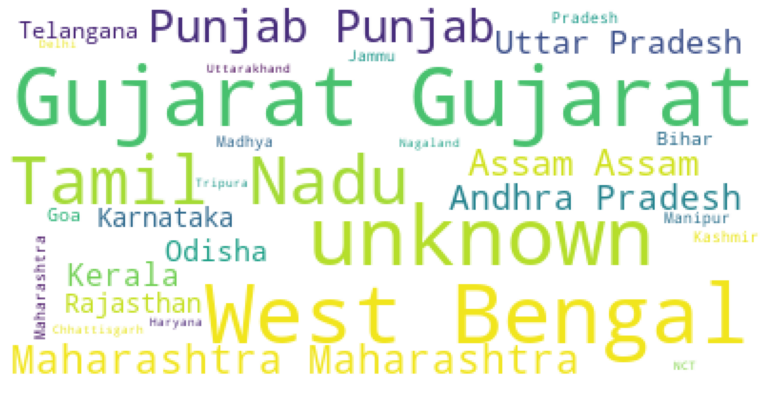

In [35]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df['state']))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [36]:
def state_infograph(statename, title) : 
    new_df = df[df['state']== statename]

    total_dishes = new_df.shape[0]

    course_df = new_df['course'].value_counts().reset_index()
    course_df.columns = ['course','num']

    diet_df = new_df['diet'].value_counts().reset_index()
    diet_df.columns = ['diet','num']
    
#     flavor_df = new_df['prep_time'].value_counts().reset_index()
#     flavor_df.columns = ['Flavor','num']

    prep_time_df = new_df['prep_time'].value_counts().reset_index()
    prep_time_df.columns = ['prep_time', 'num']

    fig = make_subplots(
        rows=2, cols=3,subplot_titles=('Total Dishes','Dishes by Courses','Dishes by Preparation time', '',''),
        specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2},{'type': 'bar','rowspan': 2}],
              [ {'type': 'pie'} , {'type': 'pie'}, {'type': 'pie'}]])

    fig.add_trace(go.Indicator(
        mode = 'number',
        value = int(total_dishes),
        number={'font':{'color': '#270082','size':50}},
    ),row=1, col=1)


    fig.add_trace(go.Bar(x=course_df['course'],y=course_df['num'], marker={'color': 'blue'}, 
                         text=course_df['num'],name='dishes by courses',textposition ='auto'),row=1, col=2)

    fig.add_trace(go.Pie(labels=diet_df['diet'], values=diet_df['num'],textinfo='percent',
                         marker= dict(colors=['#00bd0d','#fc0303'])),row=2, col=1)

    fig.add_trace(go.Bar(
        x=prep_time_df['prep_time'],y=course_df['num'],marker={'color': '#fc0335'}, text=course_df['num'],
        name='flavors by courses',textposition ='auto'),row=1, col=3)

    fig.update_layout(title_text= title,template='plotly',title_x=0.5)

    return fig.show()

In [37]:
state_infograph('Gujarat', 'Gujarat food infograph')

In [38]:
state_infograph('Punjab', 'Punjab food infograph')

In [39]:
state_infograph('Maharashtra', 'Maharashtra food infograph')

In [40]:
state_infograph('West Bengal', 'West Bengal food infograph')

In [46]:
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);
def bar_plot(type_,name, color, title, ylabel) : 
    new_df = df[df.course == type_]
    new_df = new_df.sort_values(by = name)    
    if color == 'viridis' : 
        plot = sns.barplot(x = 'name', y = name, data = new_df.tail(10), palette ='viridis');
        plt.ylabel(ylabel);
        plt.xticks(rotation = 80)
        plt.title(title);
    elif color == 'mako' :
        plot = sns.barplot(x = 'name', y = name, data = new_df.tail(10), palette ='mako');
        plt.ylabel(ylabel);
        plt.xticks(rotation = 80)
        plt.title(title);
    else : 
        plot = sns.barplot(x = 'name', y = name, data = new_df.tail(10));
        plt.ylabel(ylabel);
        plt.xticks(rotation = 80)
        plt.title(title);
    return plot
def bar_plot_plotly(type_,name,color,title) : 
    new_df_plotly = df[df.course == type_]
    new_df_plotly = new_df_plotly.sort_values(by = name)     
    if color == 'Viridis_r' :
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',
                 color_discrete_sequence= px.colors.sequential.Viridis_r,title = title);
    elif color == 'Plasma_r' : 
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',
                 color_discrete_sequence= px.colors.sequential.Plasma_r,title = title);
    elif color == 'matter_r' : 
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',
                 color_discrete_sequence= px.colors.sequential.matter_r,title = title);
    else : 
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',title = title);
    return fig.show()
    #return new_df_plotly.tail(10)

In [47]:
bar_plot_plotly('snack','prep_time','Viridis_r', 'Top 10 snacks with longest Preparation time')

In [48]:
bar_plot_plotly('dessert','prep_time', 'Plasma_r', 'Top 10 Desserts with longest Preparation time')

In [44]:
bar_plot_plotly('main course','prep_time', 'matter_r', 'Top 10 Main course with longest Preparation time')

In [49]:
fig = px.scatter(df, x = 'name', y ='total_ingredients', color='total_ingredients')
fig.update_layout(title={'text': "Ingredient count in dishes",'y':0.95,'x':0.5},
                 xaxis_title = ' Name of the dishes',
                 yaxis_title = 'Total ingredients')
fig.show()
